In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# July 2024
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

np.random.seed(0)

In [3]:
n_samples = 100

X = np.random.rand(n_samples, 1) - 0.5
y = 5 * X[:, 0] ** 2 + 0.1 * np.random.randn(n_samples)

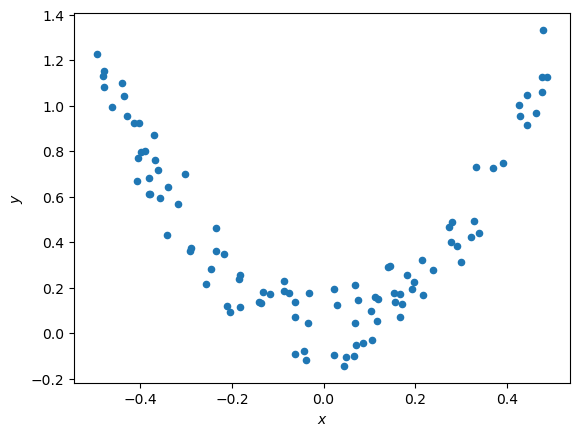

In [6]:
plt.scatter(X, y, s=20)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig('figures/quadratic_dataset.pdf', bbox_inches='tight')

In [7]:
h1 = DecisionTreeRegressor(max_depth=2, random_state=42)
h1.fit(X, y)  # Fit the first tree

DecisionTreeRegressor(max_depth=2, random_state=42)

In [14]:
F1 = [h1]  # The first ensemble
F1_pred = h1.predict(X)  # Predict using the first tree

In [15]:
print(f'R2 score of F1: {r2_score(y, F1_pred):.4f}')

R2 score of F1: 0.7819


In [16]:
y2 = y - F1_pred  # Calculate residuals
h2 = DecisionTreeRegressor(max_depth=2, random_state=42)
h2.fit(X, y2)  # Fit the second tree

DecisionTreeRegressor(max_depth=2, random_state=42)

In [19]:
F2 = [h1, h2]  # The second ensemble 
F2_pred = sum(h.predict(X) for h in F2)  # Sum predictions from both trees

In [20]:
print(f'R2 score of F2: {r2_score(y, F2_pred):.4f}')

R2 score of F2: 0.8802


In [11]:
y3 = y - F2_pred  # Calculate residuals
h3 = DecisionTreeRegressor(max_depth=2, random_state=42)
h3.fit(X, y3)  # Fit the third tree

F3 = [h1, h2, h3]  # The third ensemble
F3_pred = sum(h.predict(X) for h in F3)  # Sum predictions from all three trees

DecisionTreeRegressor(max_depth=2, random_state=42)

In [12]:
print(f'R2 score of F3: {r2_score(y, F3_pred):.4f}')

R2 score of F3: 0.9124


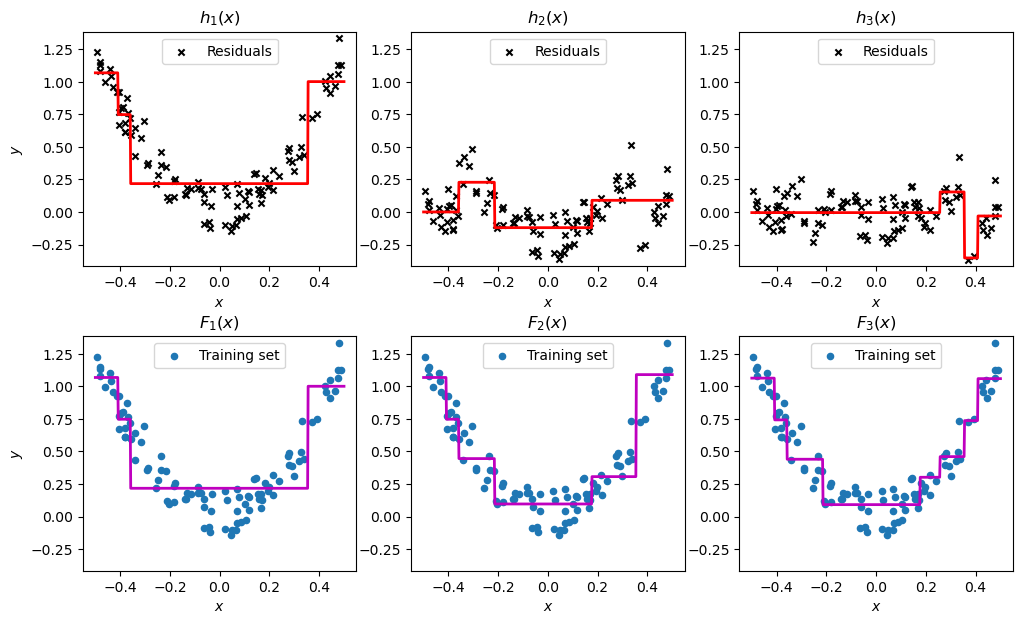

In [50]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7))
X_test = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)

# Collecting data for setting uniform y-axis limits
all_y_data = np.hstack([y, y2, y3])
y_min = all_y_data.min()
y_max = all_y_data.max()

for i, h, residuals in zip([0, 1, 2], [h1, h2, h3], [y, y2, y3]):
    ax = axes[0, i]
    y_test_pred = h.predict(X_test)
    ax.scatter(X, residuals, c='k', s=20, marker='x', label='Residuals')
    ax.plot(X_test, y_test_pred, 'r', linewidth=2)
    ax.set_title(f'$h_{i + 1}(x)$')
    ax.set_xlabel('$x$')
    if i == 0:
        ax.set_ylabel('$y$')
    ax.set_ylim(y_min - 0.05, y_max + 0.05)
    ax.legend(loc='upper center')

for i, ensemble in enumerate([F1, F2, F3]):
    ax = axes[1, i]
    y_test_pred = sum(h.predict(X_test) for h in ensemble)
    ax.scatter(X, y, s=20, label='Training set')
    ax.plot(X_test, y_test_pred, 'm', linewidth=2)
    ax.set_title(f'$F_{i + 1}(x)$')
    ax.set_xlabel('$x$')
    if i == 0:
        ax.set_ylabel('$y$')
    ax.set_ylim(y_min - 0.05, y_max + 0.05)
    ax.legend(loc='upper center')
    
fig.subplots_adjust(hspace=0.3)  # Adjust the vertical spacing
plt.savefig('figures/gradient_boosting_quadratic_dataset.pdf', bbox_inches='tight')